# Part 1 - Distribution Plot

In [2]:
import seaborn as sns
from pandas import DataFrame as d

In [3]:
%matplotlib inline

In [4]:
data = sns.load_dataset('tips')
tips = d(data)

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Distplot
* allows to show the distribution of one variable

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


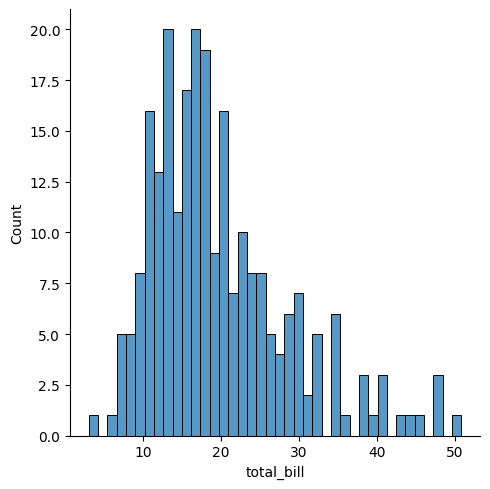

In [6]:
sns.displot(tips['total_bill'],bins =40)
#kde is by default false

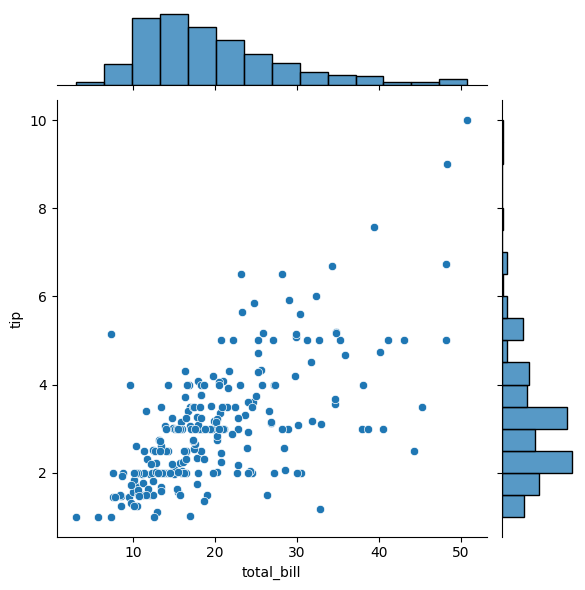

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


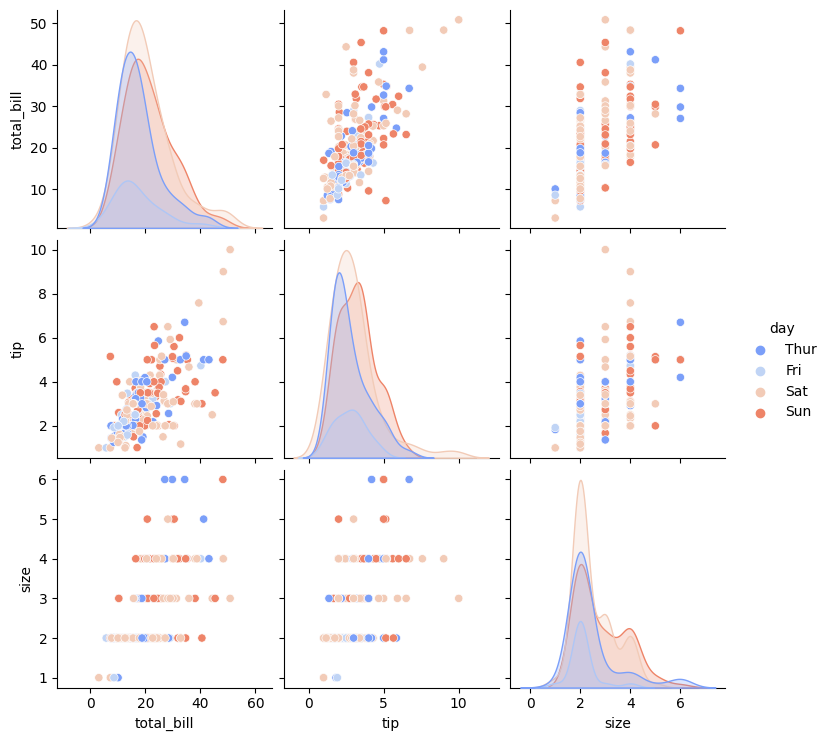

In [8]:
sns.pairplot(tips,hue='day',palette='coolwarm')

(0.0, 1.0)

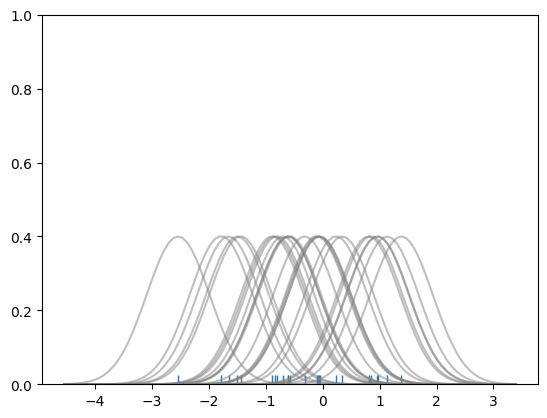

In [9]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

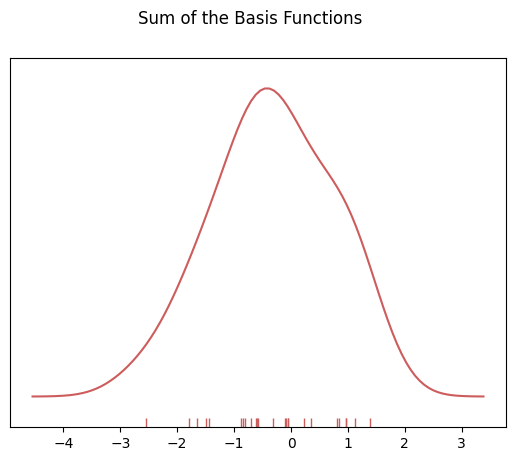

In [10]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<Axes: xlabel='total_bill', ylabel='Density'>

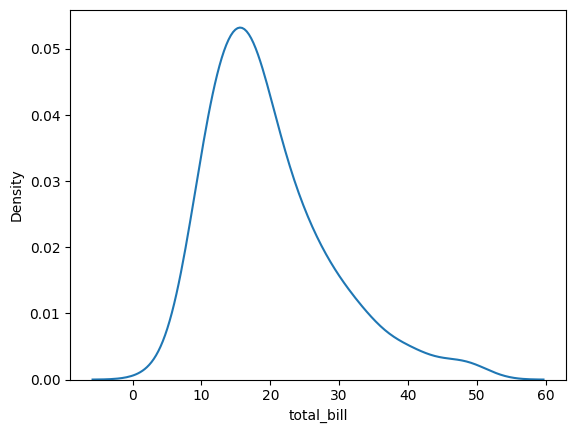

In [11]:
sns.kdeplot(tips['total_bill'])

# Part 2 - Categorical Plot

In [12]:
import numpy as np

<Axes: xlabel='sex', ylabel='total_bill'>

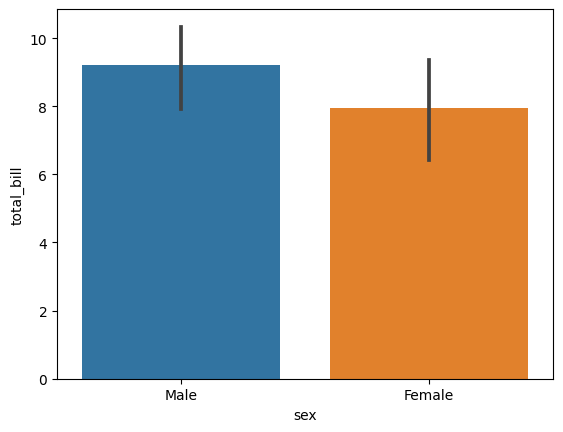

In [13]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

<Axes: xlabel='sex', ylabel='count'>

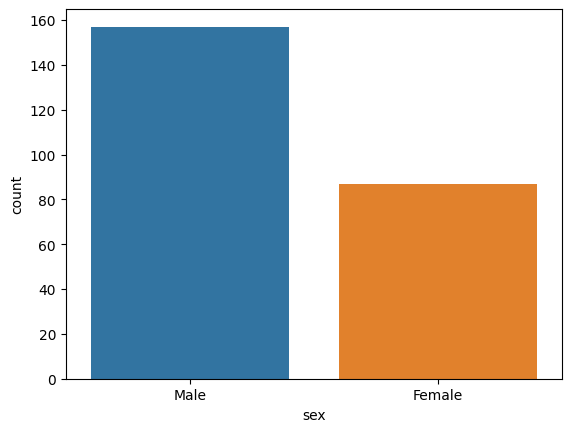

In [14]:
sns.countplot(x='sex',data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

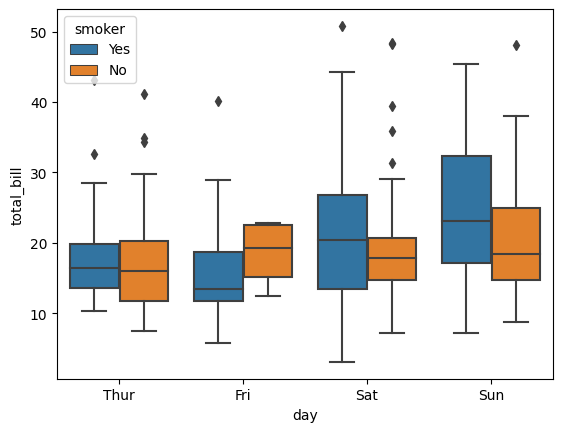

In [15]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

<Axes: xlabel='day', ylabel='total_bill'>

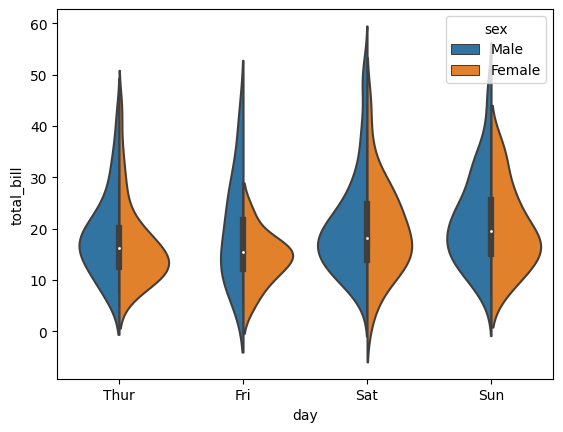

In [16]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

<Axes: xlabel='day', ylabel='total_bill'>

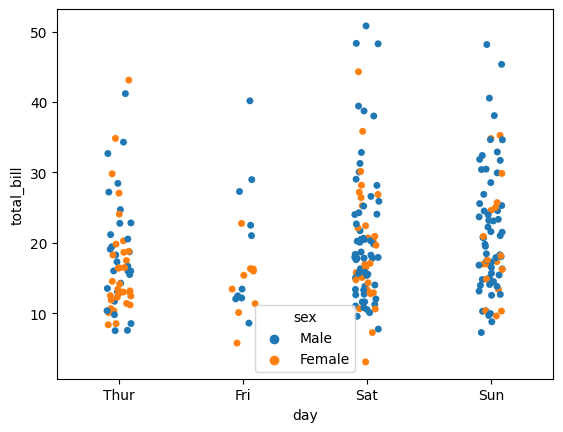

In [17]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex')
#jitter is use to avoid the collision, bydefault = True

<Axes: xlabel='day', ylabel='total_bill'>

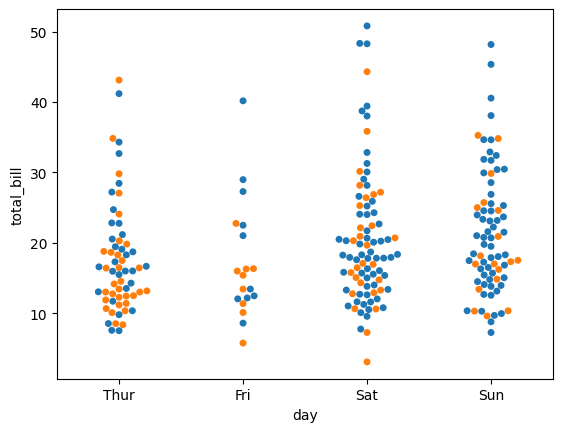

In [18]:
sns.swarmplot(x='day',y='total_bill',data=tips,hue='sex',legend=False)
#should not use for the large dataset

<Axes: xlabel='day', ylabel='total_bill'>

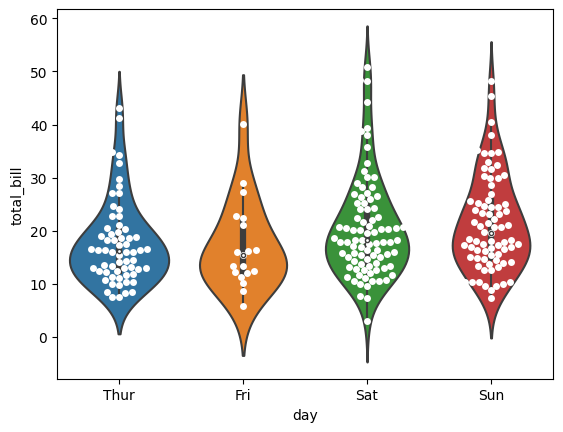

In [19]:
#we also can combine this both and create a plot over each other
sns.swarmplot(x='day',y='total_bill',data=tips,legend=False,color='white')
sns.violinplot(x='day',y='total_bill',data=tips,legend=False)

In [20]:
#sns.factor(x='day',y='total_bill',data=tips,kind='bar')
#not available in this version

# Part 3 -Matrix Plot

In [36]:
flights = sns.load_dataset('flights')

In [42]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [27]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [46]:
tc =tips.corr(numeric_only=True)
#keep this true to get the correct output

<Axes: >

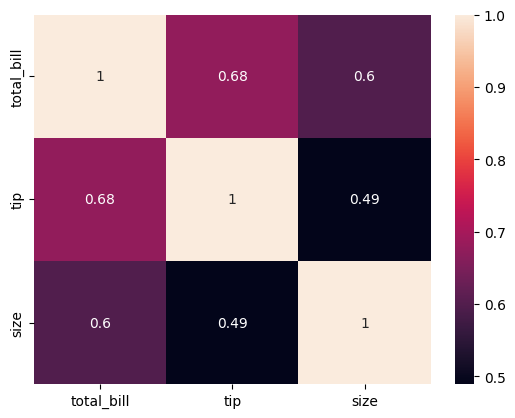

In [48]:
sns.heatmap(data=tc,annot=True)

In [50]:
fp =flights.pivot_table(index='month',columns='year',values='passengers')

<Axes: xlabel='year', ylabel='month'>

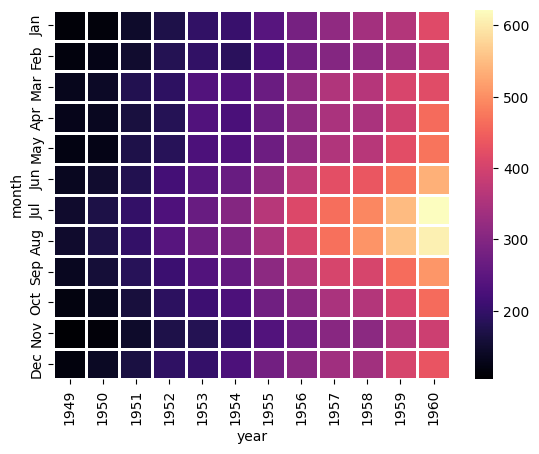

In [61]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidths=1)

Clustermap gives the most similar clumns and rows nearer to each other

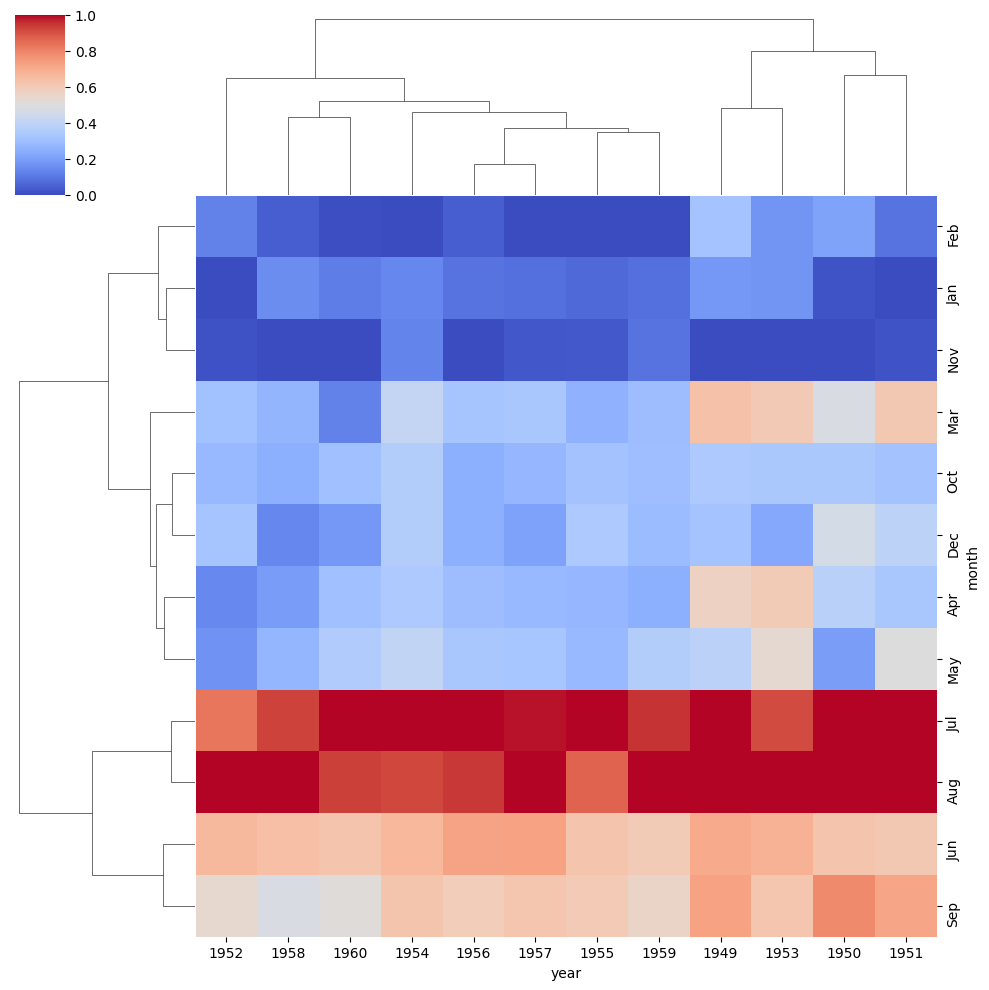

In [64]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)